# Data Scientist Salary Predictor

## Importing Dependencies

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('ds_salaries.csv')

In [3]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


## EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [5]:
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

data is having no null values.

In [6]:
df['experience_level'].value_counts()

SE    2516
MI     805
EN     320
EX     114
Name: experience_level, dtype: int64

**SE** - senior
**MI** - mid senior
**EN** - entry level
**EX** - experienced

In [7]:
df['experience_level'] = df['experience_level'].replace('EN','Entry-level')
df['experience_level'] = df['experience_level'].replace('MI','Mid-level')
df['experience_level'] = df['experience_level'].replace('SE','Senior-level')
df['experience_level'] = df['experience_level'].replace('EX','Executive-level')

In [8]:
df['employment_type'].value_counts()

FT    3718
PT      17
CT      10
FL      10
Name: employment_type, dtype: int64

**FT** - full time
**PT** - part time
**CT** - Contract
**FL** - freelance

In [9]:
df['employment_type'] = df['employment_type'].replace('FT','Full-Time')
df['employment_type'] = df['employment_type'].replace('PT','Part-Time')
df['employment_type'] = df['employment_type'].replace('CT','Contract')
df['employment_type'] = df['employment_type'].replace('FL','Freelance')

In [10]:
df['job_title'].value_counts()

Data Engineer                          1040
Data Scientist                          840
Data Analyst                            612
Machine Learning Engineer               289
Analytics Engineer                      103
                                       ... 
Principal Machine Learning Engineer       1
Azure Data Engineer                       1
Manager Data Management                   1
Marketing Data Engineer                   1
Finance Data Analyst                      1
Name: job_title, Length: 93, dtype: int64

In [11]:
df[['salary_currency','employee_residence']].nunique()

salary_currency       20
employee_residence    78
dtype: int64

In [12]:
from matplotlib import pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Salary Over The years')

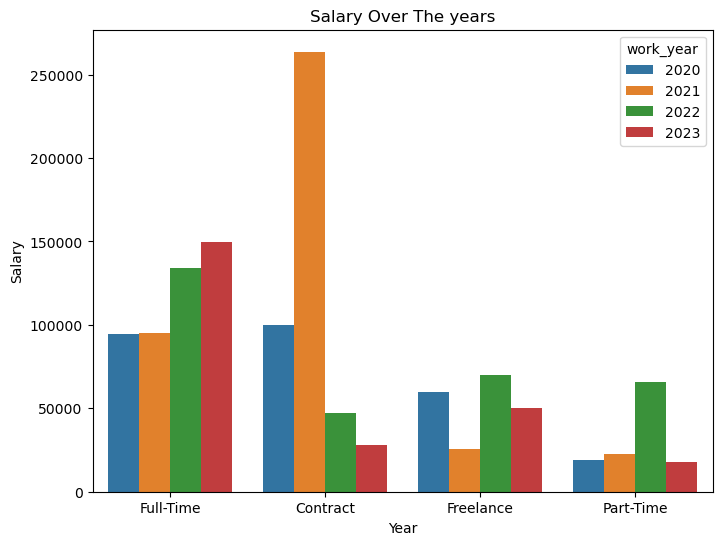

In [13]:
x=df['employment_type']
y=df['salary_in_usd']

plt.figure(figsize=(8,6))

sns.barplot(x=x, y=y,ci=None,hue=df['work_year'])
plt.xlabel('Year')
plt.ylabel('Salary')
plt.title('Salary Over The years')


###### An Increasing trend in salary over the years

Text(0.5, 1.0, 'Work Experince and Salary')

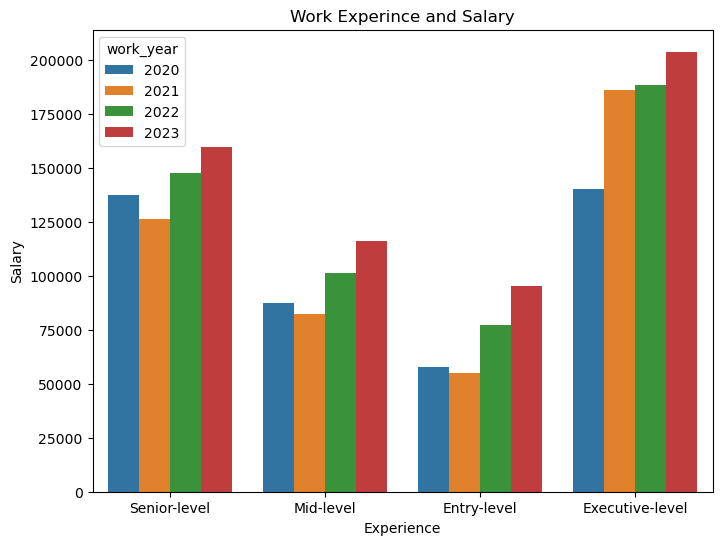

In [14]:
x=df['experience_level']
y=df['salary_in_usd']

plt.figure(figsize=(8,6))

sns.barplot(x=x,y=y,ci=None,hue=df.work_year)
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.title('Work Experince and Salary')


###### Higher Experience gives higher pay

Text(0.5, 1.0, 'Employment Type and Salary')

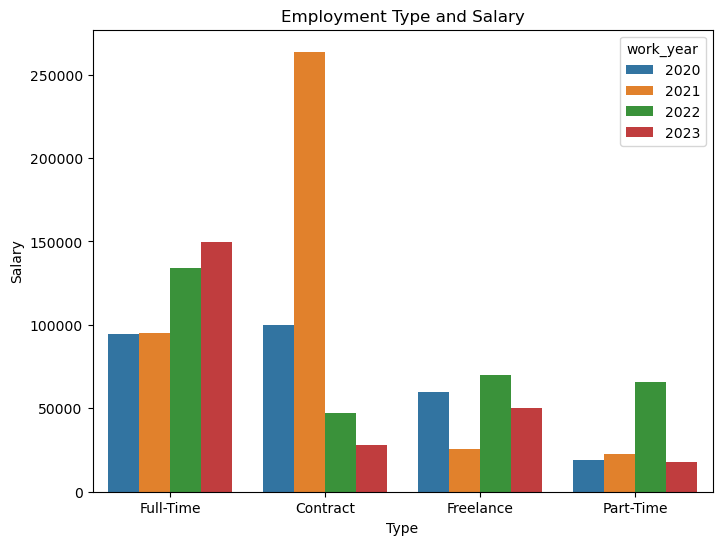

In [15]:
x=df['employment_type']
y=df['salary_in_usd']

plt.figure(figsize=(8,6))

sns.barplot(x=x,y=y,ci=None,hue=df.work_year)
plt.xlabel('Type')
plt.ylabel('Salary')
plt.title('Employment Type and Salary')

In [16]:
best_jobs = df['job_title'].value_counts().iloc[:5]

In [17]:
best_jobs    

Data Engineer                1040
Data Scientist                840
Data Analyst                  612
Machine Learning Engineer     289
Analytics Engineer            103
Name: job_title, dtype: int64

Text(0.5, 1.0, 'Most Demanded Jobs')

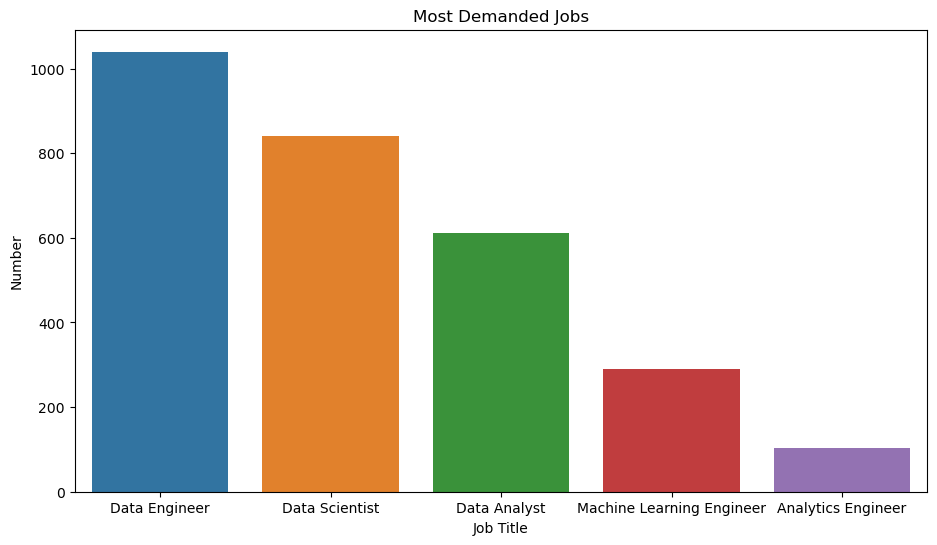

In [18]:
x=best_jobs.index
y=best_jobs.values

plt.figure(figsize=(11,6))

sns.barplot(x=x,y=y,ci=None)
plt.xlabel('Job Title')
plt.ylabel('Number')
plt.title('Most Demanded Jobs')

Text(0.5, 1.0, 'Salary and company size')

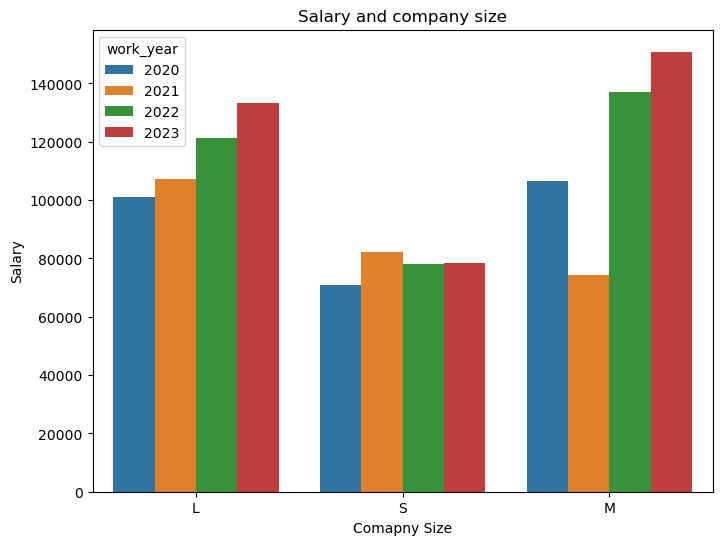

In [19]:
x=df['company_size']
y=df['salary_in_usd']

plt.figure(figsize=(8,6))

sns.barplot(x=x,y=y,ci=None,hue=df.work_year)

plt.xlabel('Comapny Size')
plt.ylabel('Salary')
plt.title('Salary and company size')

## Preprocess The Data

In [56]:
df_copy = df.copy()

In [57]:
df['job_title'].value_counts().iloc[:12]

Data Engineer                1040
Data Scientist                840
Data Analyst                  612
Machine Learning Engineer     289
Analytics Engineer            103
Data Architect                101
Research Scientist             82
Data Science Manager           58
Applied Scientist              58
Research Engineer              37
ML Engineer                    34
Data Manager                   29
Name: job_title, dtype: int64

In [58]:
def changejobtitle(value):
    if value in ['Data Engineer','Data Scientist','Data Analyst','Machine Learning Engineer','Analytics Engineer','Data Architect','Research Scientist','Data Science Manager','Applied Scientist','Research Engineer','ML Engineer','Data Manager']:
        return value
    else:
        return 'other'

In [59]:
df_copy['job_title'] = df_copy['job_title'].apply(changejobtitle)

In [60]:
df_copy['job_title'].value_counts()

Data Engineer                1040
Data Scientist                840
Data Analyst                  612
other                         472
Machine Learning Engineer     289
Analytics Engineer            103
Data Architect                101
Research Scientist             82
Applied Scientist              58
Data Science Manager           58
Research Engineer              37
ML Engineer                    34
Data Manager                   29
Name: job_title, dtype: int64

In [62]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_copy['employment_type'] = le.fit_transform(df_copy['employment_type'])
df_copy['experience_level'] = le.fit_transform(df_copy['experience_level'])
df_copy['company_size'] = le.fit_transform(df_copy['company_size'])
df_copy['job_title'] = le.fit_transform(df_copy['job_title'])
df_copy.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,3,2,12,80000,EUR,85847,ES,100,ES,0
1,2023,2,0,8,30000,USD,30000,US,100,US,2
2,2023,2,0,8,25500,USD,25500,US,100,US,2
3,2023,3,2,7,175000,USD,175000,CA,100,CA,1
4,2023,3,2,7,120000,USD,120000,CA,100,CA,1


In [63]:
df_copy.salary_currency.value_counts().iloc[:5]

USD    3224
EUR     236
GBP     161
INR      60
CAD      25
Name: salary_currency, dtype: int64

In [64]:
def changecurrencytitle(value):
    if value in ['USD','EUR','GBP','INR','CAD']:
        return value
    else:
        return 'other'

In [65]:
df_copy['salary_currency'] = df_copy['salary_currency'].apply(changecurrencytitle)

In [66]:
df_copy['salary_currency'].value_counts()

USD      3224
EUR       236
GBP       161
INR        60
other      49
CAD        25
Name: salary_currency, dtype: int64

In [78]:
df_copy.employee_residence.value_counts().iloc[0:7]

US       3004
other     262
GB        167
CA         85
ES         80
IN         71
DE         48
Name: employee_residence, dtype: int64

In [73]:
def changeresidencetitle(value):
    if value in ['US','GB','ES','IN','CA','DE','FR']:
        return value
    else:
        return 'other'

In [74]:
df_copy['employee_residence'] = df_copy['employee_residence'].apply(changeresidencetitle)

In [76]:
df_copy.employee_residence.value_counts()

US       3004
other     262
GB        167
CA         85
ES         80
IN         71
DE         48
FR         38
Name: employee_residence, dtype: int64

In [80]:
df_copy.company_location.value_counts().iloc[0:6]

US    3040
GB     172
CA      87
ES      77
IN      58
DE      56
Name: company_location, dtype: int64

In [81]:
def changeloctitle(value):
    if value in ['US','GB','ES','IN','CA','DE']:
        return value
    else:
        return 'other'

In [82]:
df_copy['company_location'] = df_copy['company_location'].apply(changeresidencetitle)

In [83]:
df_copy

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,3,2,12,80000,EUR,85847,ES,100,ES,0
1,2023,2,0,8,30000,USD,30000,US,100,US,2
2,2023,2,0,8,25500,USD,25500,US,100,US,2
3,2023,3,2,7,175000,USD,175000,CA,100,CA,1
4,2023,3,2,7,120000,USD,120000,CA,100,CA,1
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,3,2,7,412000,USD,412000,US,100,US,0
3751,2021,2,2,12,151000,USD,151000,US,100,US,0
3752,2020,0,2,7,105000,USD,105000,US,100,US,2
3753,2020,0,0,12,100000,USD,100000,US,100,US,0


In [84]:
df_copy['employee_residence'] = le.fit_transform(df_copy['employee_residence'])
df_copy['salary_currency'] = le.fit_transform(df_copy['salary_currency'])
df_copy['company_location'] = le.fit_transform(df_copy['company_location'])

In [86]:
df_copy

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,3,2,12,80000,1,85847,2,100,2,0
1,2023,2,0,8,30000,4,30000,6,100,6,2
2,2023,2,0,8,25500,4,25500,6,100,6,2
3,2023,3,2,7,175000,4,175000,0,100,0,1
4,2023,3,2,7,120000,4,120000,0,100,0,1
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,3,2,7,412000,4,412000,6,100,6,0
3751,2021,2,2,12,151000,4,151000,6,100,6,0
3752,2020,0,2,7,105000,4,105000,6,100,6,2
3753,2020,0,0,12,100000,4,100000,6,100,6,0


In [87]:
df_copy.drop_duplicates(keep = 'first')

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,3,2,12,80000,1,85847,2,100,2,0
1,2023,2,0,8,30000,4,30000,6,100,6,2
2,2023,2,0,8,25500,4,25500,6,100,6,2
3,2023,3,2,7,175000,4,175000,0,100,0,1
4,2023,3,2,7,120000,4,120000,0,100,0,1
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,3,2,7,412000,4,412000,6,100,6,0
3751,2021,2,2,12,151000,4,151000,6,100,6,0
3752,2020,0,2,7,105000,4,105000,6,100,6,2
3753,2020,0,0,12,100000,4,100000,6,100,6,0


In [100]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, accuracy_score
from sklearn.model_selection import GridSearchCV

In [90]:
x=df_copy.drop(columns='salary')
x=df_copy.drop(columns='salary_in_usd')

In [92]:
y=df_copy.salary_in_usd

In [94]:
x_train, x_valid, y_train, y_valid = train_test_split(x,y, train_size=0.8, random_state=0)

In [125]:
model = RandomForestRegressor(n_estimators=50, random_state=0)

In [126]:
model.fit(x_train,y_train)

RandomForestRegressor(n_estimators=50, random_state=0)

In [127]:
y_pred = model.predict(x_valid)

In [128]:
mae = mean_absolute_error(y_valid, y_pred)

print("MEA RandomForestRegressor: ", mae)

MEA RandomForestRegressor:  2477.1702529960053


In [129]:
random_forest_tuning = RandomForestRegressor(random_state=0)

param_grid = {
    "n_estimators" : [50,100,200],
    "max_depth" : [None, 5, 10], 
    "min_samples_split" : [2,5], 
    "min_samples_leaf" : [1,2] 
}

GSCV = GridSearchCV(estimator=random_forest_tuning, param_grid=param_grid, cv=5)
GSCV.fit(x_train, y_train)
GSCV.best_params_ 

{'max_depth': 10,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 100}

In [130]:
tuned_model = RandomForestRegressor(random_state=0, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100)

In [131]:
tuned_model.fit(x_train,y_train)

RandomForestRegressor(max_depth=10, min_samples_split=5, random_state=0)

In [132]:
y_pred = tuned_model.predict(x_valid)

In [133]:
mae = mean_absolute_error(y_valid, y_pred)

print("MEA RandomForestRegressor: ", mae)

MEA RandomForestRegressor:  2467.267191521057


In [135]:
import pickle
pickle.dump(tuned_model, open('RFmodel.pkl', 'wb'))